In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

In [13]:
DATA_PATH="/home/alumno/Desktop/datos/cassava"
CSV_FILE="/home/alumno/Desktop/datos/cassava/cassava_split.csv"
IMAGES_PATH="/home/alumno/Desktop/datos/cassava/images"
LABELS_FILE="/home/alumno/Desktop/datos/cassava/label_num_to_disease_map.json"
print(CSV_FILE)

/home/alumno/Desktop/datos/cassava/cassava_split.csv


In [14]:
# Display example 5 images per class from the dataset
def display_example_images_per_class(csv_file, images_path, labels_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    class_names = pd.read_json(labels_file, typ='series').to_dict()

    # Get unique classes
    classes = df['label'].unique()

    # Set up the plot
    fig, axes = plt.subplots(len(classes), 5, figsize=(15, 3 * len(classes)))
    
    for i, cls in enumerate(classes):
        # Filter images for the current class
        class_images = df[df['label'] == cls]['image_id'].values[:5]
        class_name = class_names[cls]
        
        for j, img_id in enumerate(class_images):
            img_path = f"{images_path}/{img_id}"
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f"Examples of Class: {class_name}", fontsize=16)
    
    plt.tight_layout()
    plt.show()

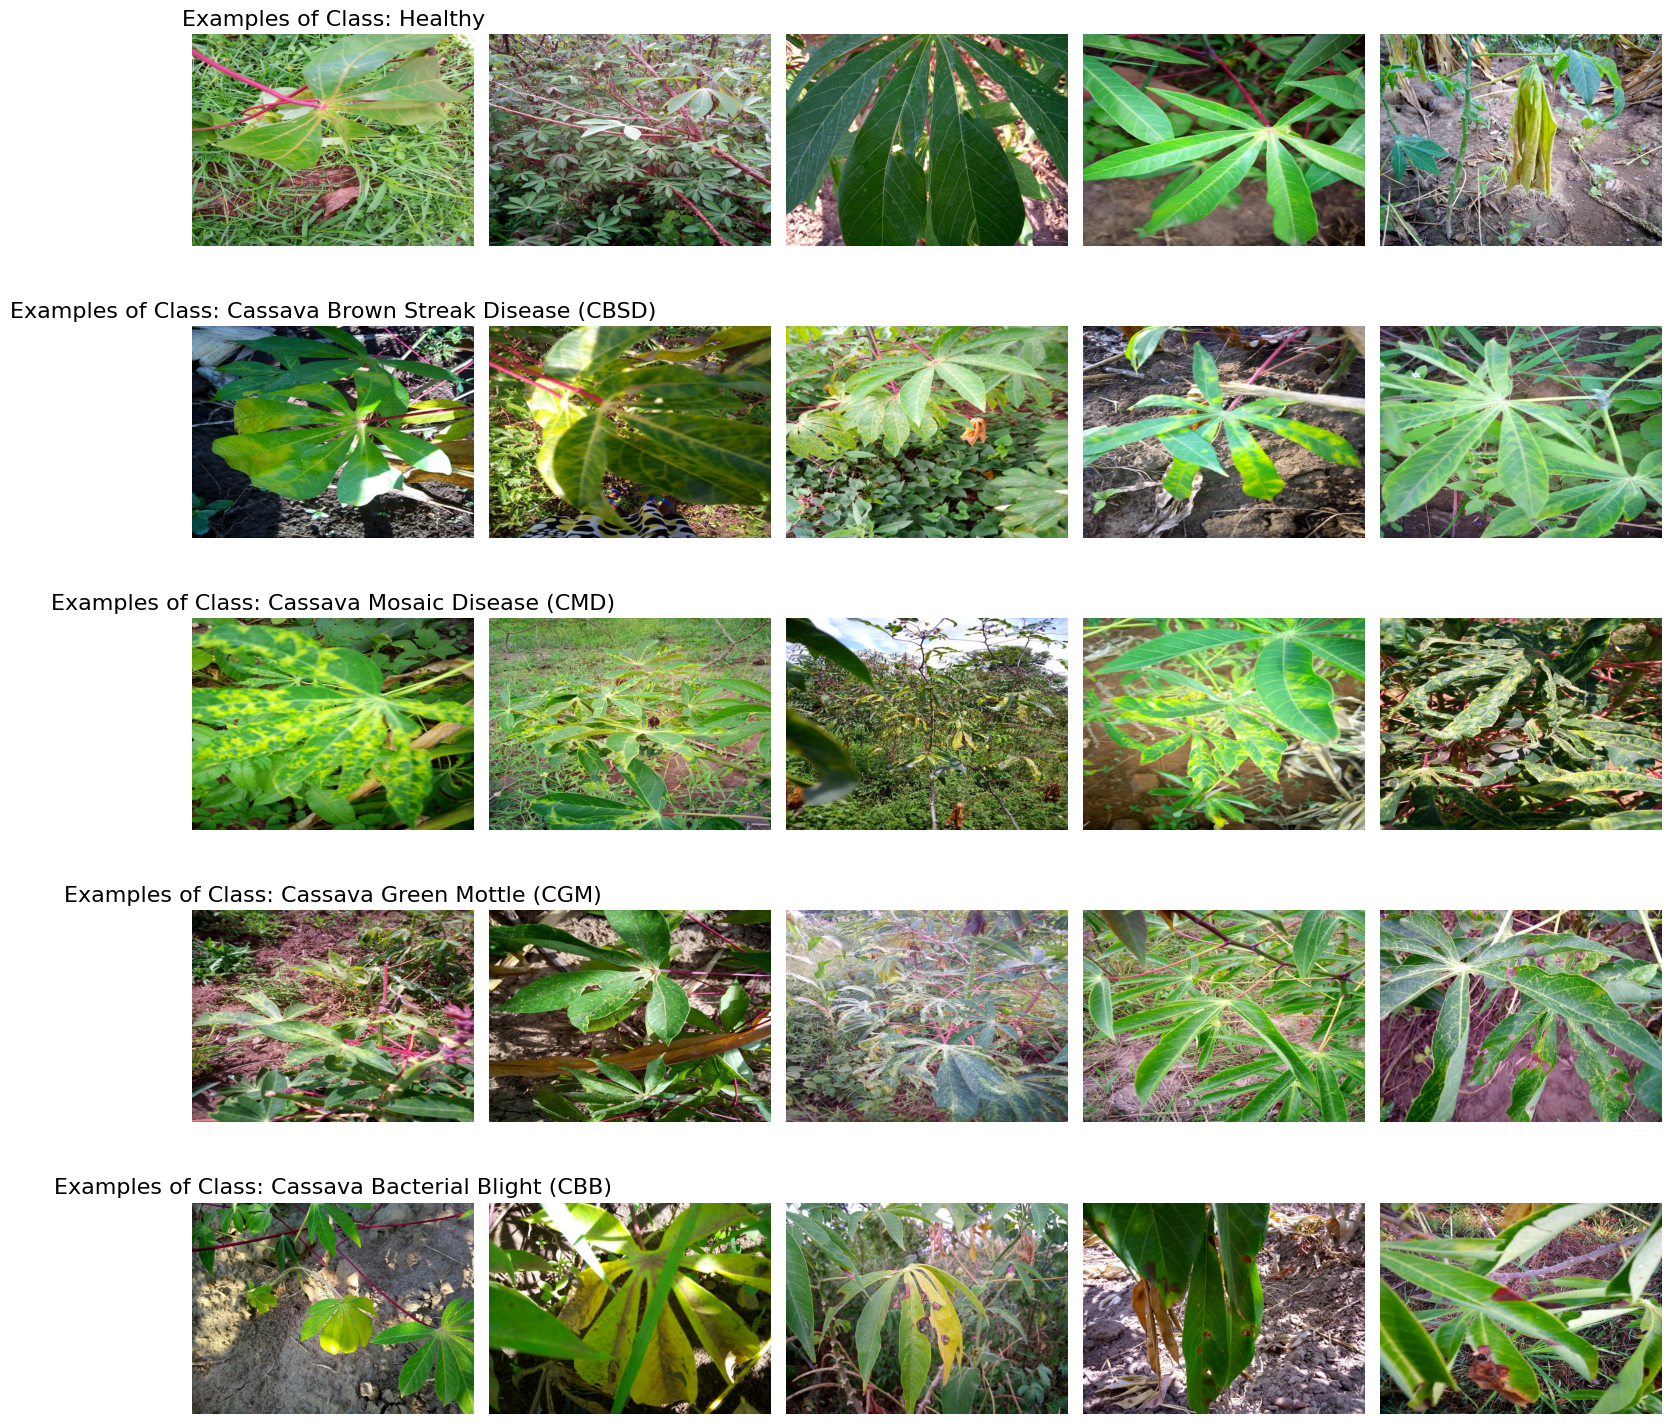

In [15]:
# Call the function to display images
display_example_images_per_class(CSV_FILE, IMAGES_PATH, LABELS_FILE)

In [16]:
# Plot color palette per class (because many examples, we sample a few from each and extract the k clusters)

def plot_color_palette_per_class(csv_file, images_path, labels_file, num_samples=10, num_colors=5):
    from sklearn.cluster import KMeans

    # Load the CSV file
    df = pd.read_csv(csv_file)
    class_names = pd.read_json(labels_file, typ='series').to_dict()

    # Get unique classes
    classes = df['label'].unique()

    # Set up the plot
    fig, axes = plt.subplots(len(classes), 1, figsize=(8, 3 * len(classes)))
    
    for i, cls in enumerate(classes):
        # Filter images for the current class and sample
        class_images = df[df['label'] == cls]['image_id'].values
        sampled_images = np.random.choice(class_images, size=min(num_samples, len(class_images)), replace=False)
        
        # Collect colors
        all_colors = []
        for img_id in sampled_images:
            img_path = f"{images_path}/{img_id}"
            img = plt.imread(img_path)
            img = img.reshape(-1, 3)  # Reshape to a list of pixels
            
            # Use KMeans to find dominant colors
            kmeans = KMeans(n_clusters=num_colors)
            kmeans.fit(img)
            all_colors.extend(kmeans.cluster_centers_)
        
        # Average colors across sampled images
        all_colors = np.array(all_colors)
        kmeans_final = KMeans(n_clusters=num_colors)
        kmeans_final.fit(all_colors)
        
        # Plot the color palette
        palette = kmeans_final.cluster_centers_.astype(int)
        axes[i].imshow([palette])
        axes[i].axis('off')
        axes[i].set_title(f"Color Palette for Class: {class_names[cls]}", fontsize=16)
    
    plt.tight_layout()
    plt.show()

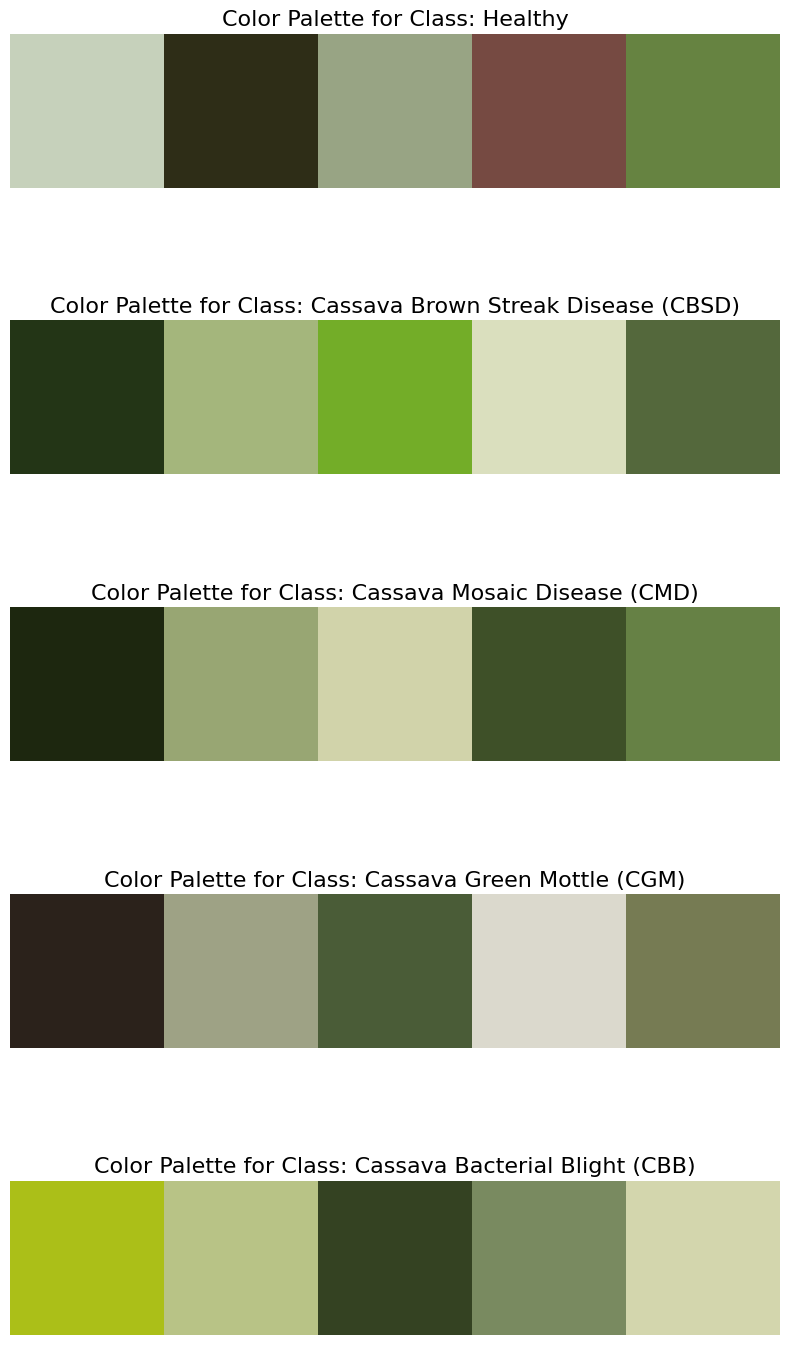

In [17]:
# Call the function to plot color palettes
plot_color_palette_per_class(CSV_FILE, IMAGES_PATH, LABELS_FILE)